In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Riddler Express, 2019-06-29

Define:

 * $red_i$: the number of red balls in bucket $i$
 * $blue_i$: the number of blue balls in bucket $i$
 * $n$: the total number of balls (which should be even)
 
such that $red_1 + red_2 = \frac{n}{2}$ and $blue_1 + blue_2 = \frac{n}{2}$.

Assuming that there is a 0.5 chance of either bucket being picked, the probability of drawing a red ball is given by

$p_{red} = 0.5 \frac{red_1}{red_1 + blue_1} + 0.5 \frac{red_2}{red_2 + blue_2}$

$p_{red}= 0.5 \frac{red_1}{red_1 + blue_1} + 0.5 \frac{\frac{n}{2} - red_1}{n - (red_1 + blue_1)}$

assuming that $0 < red_1 + blue_1 < n$.

In [99]:
def p1(r1, b1, n):
    t1 = r1 + b1
    if t1 == 0 or t1 == n:
        return 0.0
    else:
        return 0.5 * r1 / t1 + 0.5 * (n//2 - r1) / (n - t1)

p1v = np.vectorize(p1)

In [100]:
p1(1, 0, 100)

0.7474747474747475

max=0.7474747474747475


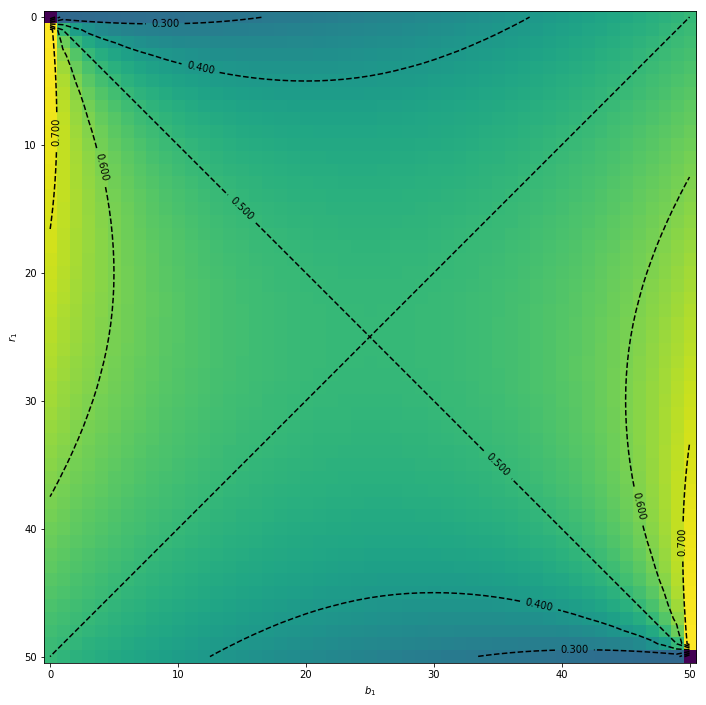

In [101]:
n = 100
rtot = btot = n//2
p = np.zeros((rtot+1,btot+1))
for i, j in np.ndindex(p.shape):
    p[i,j] = p1(i,j,n)
print("max=%s" % p.max())
    
fig1 = plt.figure(figsize=(12, 12))
ax11 = fig1.add_subplot(111)
ax11.imshow(p)
cs = ax11.contour(p, colors='black', linestyles="dashed")
ax11.clabel(cs)
ax11.set_xlabel('$b_1$')
ax11.set_ylabel('$r_1$')
fig1.show()

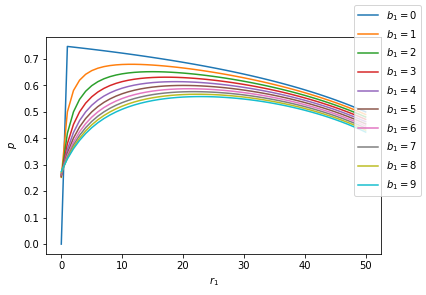

In [93]:
fig2 = plt.figure()
ax21 = fig2.add_subplot(111)
r = np.arange(0, 51)
for b1 in range(0,10):
    ax21.plot(r, p1v(r, b1, 100), label='$b_1=%d$' % (b1,))
#ax1.plot(x, p1v(x, 1, 100), label='$b_1=1$')
#ax1.plot(x, p1v(x, 2, 100), label='$b_1=2$')
#ax1.plot(x, p1v(x, 3, 100), label='$b_1=3$')
fig2.legend()
ax21.set_xlabel('$r_1$')
ax21.set_ylabel('$p$')
fig2.show()

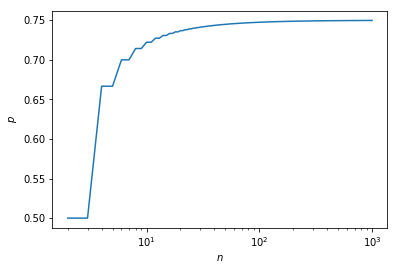

In [87]:
n = np.arange(2,1000)
plt.plot(n, p1v(1, 0, n))
plt.ylabel('$p$')
plt.xlabel('$n$')
plt.xscale('log')
plt.show()